# HW4 Problem:  Predicting Solubility -- using Applied Predictive Modeling

For this problem you will analyze a variant of the <i>Solubility</i> dataset studied in [APM]
(the <i>Applied Predictive Modeling</i> course text).  You can use the results about Solubility in this book in any way you choose.

This is easy if you use the APM methodology, which helps automate construction of models.
Some code from the [APM] book is also included below.

Because the solubility data we provide is not the same as the data used in the book,
the best-performing models derived in the book may not yield the best results for you.
However the models presented in the book should be very good starting points.

<hr style="border-width:20px;">

#  The Goal

In this assignment you are to predict the solubility values for a set of test data:
<ul><li>
Given the file <tt>training_set</tt>, develop a regression model that is as accurate as possible.
</li><li>
Use your model to predict solubility for each row of data in <tt>test_set.csv</tt>.
</li><li>
Put your predictions in a .csv file called  <tt>HW4_Solubility_Predictions.csv</tt> and upload it to CCLE.
</li></ul>

<hr style="border-width:20px;">

## Step 1: download your data, using your UID

<blockquote>

Download the music data at:
<br/>
http://datamining.cs.ucla.edu/cs249/hw4/solubility/___PUT_YOUR_UID_HERE___.zip

<br/>
<br/>
<i>For example, if your UID is  123456789, download the file</i>
    http://datamining.cs.ucla.edu/cs249/hw4/solubility/123456789.zip
    
</blockquote>
    
This zip file has two csv data files:  a training set and a test set.

<hr style="border-width:20px;">

## Step 2: construct a model from <tt>training_set.csv</tt>

Using the <tt>training_set.csv</tt> data, construct a regression model.

<br/>
<b>YOU CAN USE ANY ENVIRONMENT YOU LIKE TO BUILD A REGRESSION MODEL.</b>
Please construct the most accurate models you can.

<hr style="border-width:20px;">

## Step 3: generate predictions from <tt>test_set.csv</tt>
    
The rows of file <tt>test_set.csv</tt> have input features for a number of molecules.
Using your classifer, produce solubility predictions for each of them.

<br/>
Put one predicted class name per line in a CSV file <tt>HW4_Solubility_Predictions.csv</tt>.
This file should also have the header line "<tt>Solubility</tt>".

<br/>
<i>Your score on this problem will be the R-squared value of these predictions.</i>
<br/>

<hr style="border-width:20px;">

## Step 4: upload <tt>HW4_Solubility_Predictions.csv</tt> and your notebook to CCLE

Finally, go to CCLE and upload:
<ul><li>
your output CSV file <tt>HW4_Solubility_Predictions.csv</tt>
</li><li>
your notebook file <tt>HW4_Solubility_Predictions.ipynb</tt>
</li></ul>

We are not planning to run any of the uploaded notebooks.
However, your notebook should have the commands you used in developing your models ---
in order to show your work.
As announced, all assignment grading in this course will be automated,
and the notebook is needed in order to check results of the grading program.

<hr style="border-width:20px;">


#  Appied Predictive Modeling

An integrated package for supervised learning, using over 50 kinds of
models, and a variety of different metrics:</p>

<pre><code>  Applied Predictive Modeling
  M. Kuhn and K. Johnson
  Springer-Verlag, 2013.
  ISBN: 978-1-4614-6848-6 (Print)

</code></pre>
<p><a href="http://link.springer.com/book/10.1007%2F978-1-4614-6849-3">http://link.springer.com/book/10.1007%2F978-1-4614-6849-3</a></p>
<p>[APM] is similar to [ISL] and [ESL] but emphasizes practical model
development/evaluation, including case histories with R scripts.</p>
<p>Its <tt>caret</tt> library (<a href="http://caret.r-forge.r-project.org">http://caret.r-forge.r-project.org</a>) is integrated with R packages that support Supervised Learning using
mainstream model evaluation methods and  100 popular models.</p>
<p>caret package manual (PDF):  <a href="http://cran.r-project.org/web/packages/caret/caret.pdf">http://cran.r-project.org/web/packages/caret/caret.pdf</a></p>
<p>List of models in caret (reproduced as a table below):
<a href="http://caret.r-forge.r-project.org/modelList.html">http://caret.r-forge.r-project.org/modelList.html</a></p>
<p>caret package overview: <a href="http://www.jstatsoft.org/v28/i05/paper">http://www.jstatsoft.org/v28/i05/paper</a>

In [1]:
not.installed <- function(pkg) !is.element(pkg, installed.packages()[,1])
    
if (not.installed("caret")) install.packages("caret", repos="http://cran.us.r-project.org")

library(caret)

Warning message:
: package 'caret' was built under R version 3.2.5Loading required package: lattice
Loading required package: ggplot2
Warning message:
: package 'ggplot2' was built under R version 3.2.5

In [2]:
 library(help=caret)

In [2]:
if (not.installed("AppliedPredictiveModeling")) {
    
    install.packages("AppliedPredictiveModeling", repos="http://cran.us.r-project.org")
    library(AppliedPredictiveModeling)
    
    for (chapter in c(2,3,4,6,7,8,10, 11,12,13,14,16,17,19))  getPackages(chapter)  # this takes a while

} else {

    library(AppliedPredictiveModeling)

}

Warning message:
: package 'AppliedPredictiveModeling' was built under R version 3.2.5

In [4]:
# library(help=AppliedPredictiveModeling)

In [5]:
# Grid Search is often used in APM to search a model's parameter space, and
# some chapters use the "doMC" package to do Multi-Core computation
# (supported only on Linux or MacOS):

#if (not.installed("doMC"))  install.packages("doMC", repos="http://cran.us.r-project.org")   # multicore computation in R
#library(doMC)
if (not.installed("doSNOW"))  install.packages("doSNOW", repos="http://cran.us.r-project.org")   # multicore computation in R in windows
library(doSNOW)
if (not.installed("doParallel"))  install.packages("doParallel", repos="http://cran.us.r-project.org")   # multicore computation in R in windows
library(doParallel)

Warning message:
: package 'doSNOW' was built under R version 3.2.5Loading required package: foreach
Warning message:
: package 'foreach' was built under R version 3.2.5Loading required package: iterators
Loading required package: snow
Warning message:
: package 'doParallel' was built under R version 3.2.5Loading required package: parallel

Attaching package: 'parallel'

The following objects are masked from 'package:snow':

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, clusterSplit, makeCluster, parApply,
    parCapply, parLapply, parRapply, parSapply, splitIndices,
    stopCluster



In [ ]:
# library(help=doMC)

The chapters use the following models:</p>
<pre>
02_A_Short_Tour.R           lm, earth
04_Over_Fitting.R           svmRadial, glm
06_Linear_Regression.R      lm, pls, pcr, ridge, enet
07_Non-Linear_Reg.R         avNNet, earth, svmRadial, svmPoly, knn
08_Regression_Trees.R       rpart, ctree, M5, treebag, rf, cforest, gbm
10_Case_Study_Concrete.R    lm, pls, enet, earth, svmRadial, avNNet, rpart,
                            treebag, ctree, rf, gbm, cubist, M5, Nelder-Mead
11_Class_Performance.R      glm
12_Discriminant_Analysis.R  svmRadial, glm, lda, pls, glmnet, pam
13_Non-Linear_Class.R       mda, nnet, avNNet, fda, svmRadial, svmPoly, knn, nb
14_Class_Trees.R            rpart, J48, PART, treebag, rf, gbm, C5.0
16_Class_Imbalance.R        rf, glm, fda, svmRadial, rpart, C5.0
17_Job_Scheduling.R         rpart, lda, sparseLDA, nnet, pls, fda, rf, C5.0,
                            treebag, svmRadial
19_Feature_Select.R         rf, lda, svmRadial, nb, glm, knn, svmRadial, knn
</pre>

<p>Training control methods used by the scripts:</p>
<pre>
04_Over_Fitting.R           repeatedcv, cv, LOOCV, LGOCV, boot, boot632
06_Linear_Regression.R      cv
07_Non-Linear_Reg.R         cv
08_Regression_Trees.R       cv, oob
10_Case_Study_Concrete.R    repeatedcv
11_Class_Performance.R      repeatedcv
12_Discriminant_Analysis.R  cv, LGOCV
13_Non-Linear_Class.R       LGOCV
14_Class_Trees.R            LGOCV
16_Class_Imbalance.R        cv
17_Job_Scheduling.R         repeatedcv
19_Feature_Select.R         repeatedcv, cv
</pre>


APMchapters = c(
"",
"02_A_Short_Tour.R",
"03_Data_Pre_Processing.R",
"04_Over_Fitting.R",
"",
"06_Linear_Regression.R",
"07_Non-Linear_Reg.R",
"08_Regression_Trees.R",
"",
"10_Case_Study_Concrete.R",
"11_Class_Performance.R",
"12_Discriminant_Analysis.R",
"13_Non-Linear_Class.R",
"14_Class_Trees.R",
"",
"16_Class_Imbalance.R",
"17_Job_Scheduling.R",
"18_Importance.R",
"19_Feature_Select.R",
"CreateGrantData.R")

showChapterScript = function(n) {
  if (APMchapters[n] != "")
    file.show( file.path( scriptLocation(), APMchapters[n] ))
}

showChapterOutput = function(n) {
  if (APMchapters[n] != "")
    file.show( file.path( scriptLocation(), paste(APMchapters[n],"out",sep="") ))
}

runChapterScript = function(n) {
  if (APMchapters[n] != "")
    source( file.path( scriptLocation(), APMchapters[n] ),  echo=TRUE )
}


In [10]:
APMchapters = c( "", "02_A_Short_Tour.R", "03_Data_Pre_Processing.R", "04_Over_Fitting.R", "", "06_Linear_Regression.R", "07_Non-Linear_Reg.R", "08_Regression_Trees.R", "", "10_Case_Study_Concrete.R", "11_Class_Performance.R", "12_Discriminant_Analysis.R", "13_Non-Linear_Class.R", "14_Class_Trees.R", "", "16_Class_Imbalance.R", "17_Job_Scheduling.R", "18_Importance.R", "19_Feature_Select.R", "CreateGrantData.R")
showChapterScript = function(n) { if (APMchapters[n] != "") file.show( file.path( scriptLocation(), APMchapters[n] )) }
showChapterOutput = function(n) { if (APMchapters[n] != "") file.show( file.path( scriptLocation(), paste(APMchapters[n],"out",sep="") )) }
runChapterScript = function(n) { if (APMchapters[n] != "") source( file.path( scriptLocation(), APMchapters[n] ), echo=TRUE ) }

In [11]:
showChapterScript(2)

In [ ]:
#  runChapterScript(2)   #  don't run -- currently seems to die when executing  plot(marsFit)

##     user  system elapsed 
##    4.971   0.114   5.292

In [ ]:
# Another way to run the script for Chapter 2:

PATIENT = FALSE

if (PATIENT) {
   current_working_directory = getwd()  # remember current directory

   chapter_code_directory = scriptLocation()

   setwd( chapter_code_directory )
   print(dir())

   print(source("02_A_Short_Tour.R", echo=TRUE))

   setwd(current_working_directory)  # return to working directory
}

Linear Regression 

1107 samples
  13 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 997, 996, 995, 996, 997, 996, ... 
Resampling results:

  RMSE      Rsquared
  4.604285  0.628494

 
Linear Regression 

1107 samples
  14 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 997, 996, 995, 996, 997, 996, ... 
Resampling results:

  RMSE      Rsquared 
  4.228432  0.6843226

 


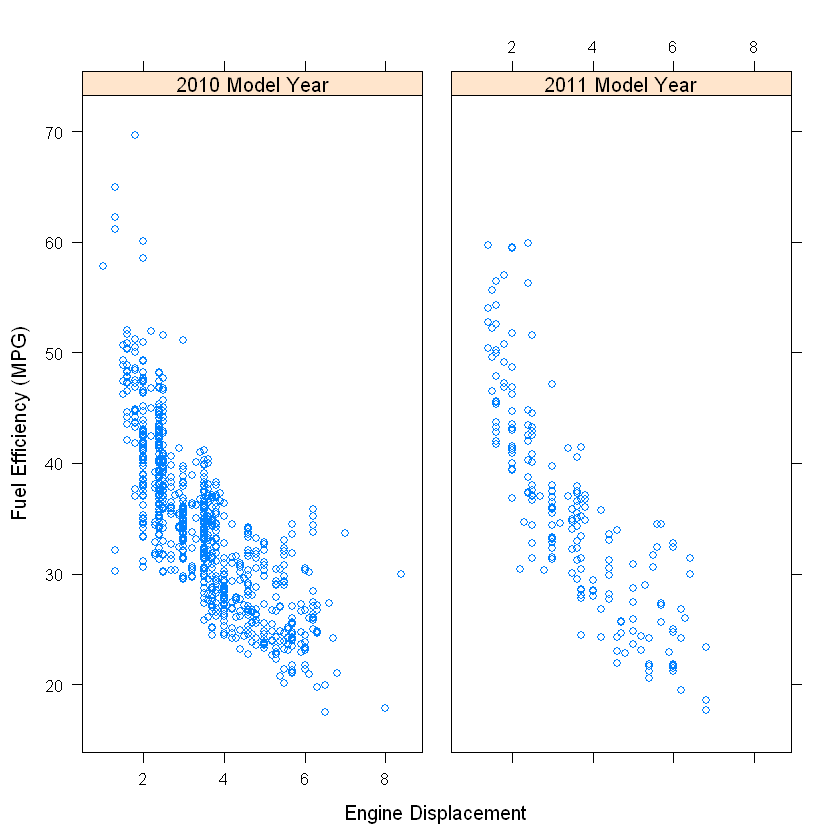

In [7]:
## Another way to run the Chapter 2 script

library(AppliedPredictiveModeling)
data(FuelEconomy)

## Format data for plotting against engine displacement

## Sort by engine displacement
cars2010 <- cars2010[order(cars2010$EngDispl),]
cars2011 <- cars2011[order(cars2011$EngDispl),]

## Combine data into one data frame
cars2010a <- cars2010
cars2010a$Year <- "2010 Model Year"
cars2011a <- cars2011
cars2011a$Year <- "2011 Model Year"

plotData <- rbind(cars2010a, cars2011a)

library(lattice)

print(
    xyplot(FE ~ EngDispl|Year, plotData,
       xlab = "Engine Displacement",
       ylab = "Fuel Efficiency (MPG)",
       between = list(x = 1.2))
)

##########  'plot' routines in the lattice package must be print'ed to obtain their output !

## Fit a single linear model and conduct 10-fold CV to estimate the error

library(caret)
set.seed(1)
lm1Fit <- train(FE ~ EngDispl,
                data = cars2010,
                method = "lm",
                trControl = trainControl(method= "cv"))
print(lm1Fit)


## Fit a quadratic model too

## Create squared terms
cars2010$ED2 <- cars2010$EngDispl^2
cars2011$ED2 <- cars2011$EngDispl^2

set.seed(1)
lm2Fit <- train(FE ~ EngDispl + ED2,
                data = cars2010,
                method = "lm",
                trControl = trainControl(method= "cv"))
print(lm2Fit)

also installing the dependencies 'plotrix', 'plotmo', 'TeachingDemos'



package 'plotrix' successfully unpacked and MD5 sums checked
package 'plotmo' successfully unpacked and MD5 sums checked
package 'TeachingDemos' successfully unpacked and MD5 sums checked
package 'earth' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\niulongjia\AppData\Local\Temp\Rtmp04otkQ\downloaded_packages


Warning message:
: package 'earth' was built under R version 3.2.5Loading required package: plotmo
Warning message:
: package 'plotmo' was built under R version 3.2.5Loading required package: plotrix
Warning message:
: package 'plotrix' was built under R version 3.2.5Loading required package: TeachingDemos
Warning message:
: package 'TeachingDemos' was built under R version 3.2.5

Multivariate Adaptive Regression Spline 

1107 samples
  14 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 997, 996, 995, 996, 997, 996, ... 
Resampling results across tuning parameters:

  nprune  RMSE      Rsquared 
  2       4.295551  0.6734579
  3       4.255755  0.6802699
  4       4.224908  0.6849626
  5       4.246868  0.6824923

Tuning parameter 'degree' was held constant at a value of 1
RMSE was used to select the optimal model using  the smallest value.
The final values used for the model were nprune = 4 and degree = 1. 


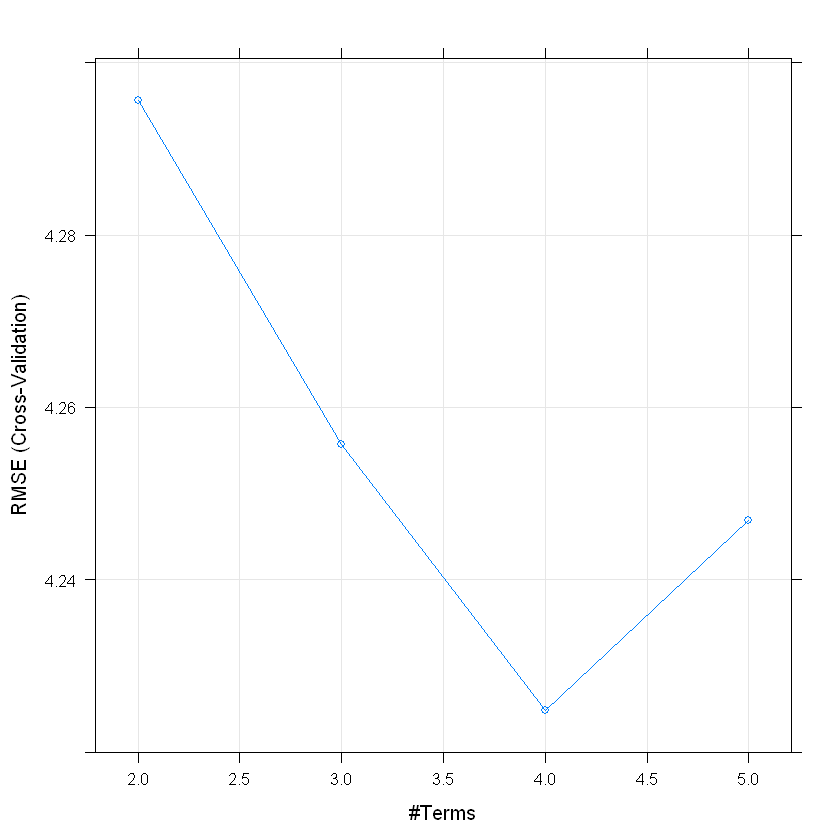

In [8]:
## Finally a MARS model (via the earth package)
if (not.installed("earth"))  install.packages("earth", repos="http://cran.us.r-project.org")   # multicore computation in R in windows
library(earth)
set.seed(1)
marsFit <- train(FE ~ EngDispl,
                 data = cars2010,
                 method = "earth",
                 tuneLength = 15,
                 trControl = trainControl(method= "cv"))
print(marsFit)


plot(marsFit)


In [10]:
head(cars2011)

EngDispl NumCyl Transmission      FE AirAspirationMethod NumGears
234      1.4      4           S6 50.4000        Turbocharged        6
235      1.4      4           S6 54.0500        Turbocharged        6
236      1.4      4           M6 59.7000        Turbocharged        6
237      1.4      4           AV 52.7496  NaturallyAspirated        1
24       1.5      4           M6 52.2000  NaturallyAspirated        6
25       1.5      4        Other 55.6446  NaturallyAspirated        1
    TransLockup TransCreeperGear          DriveDesc IntakeValvePerCyl
234           1                0 TwoWheelDriveFront                 2
235           1                0 TwoWheelDriveFront                 2
236           0                0 TwoWheelDriveFront                 2
237           0                0 TwoWheelDriveFront                 2
24            0                0 TwoWheelDriveFront                 2
25            1                0 TwoWheelDriveFront                 2
    ExhaustValvesPerCyl CarlineClassDesc VarValveTiming VarValveLift  ED2
234                   2      CompactCars              1            0 1.96
235                   2      CompactCars              1            0 1.96
236                   2      CompactCars              1            0 1.96
237                   2      CompactCars              1            0 1.96
24                    2         2Seaters              1            1 2.25
25                    2         2Seaters              1            1 2.25
         lm1      lm2        y
234 44.23393 48.45189 49.51023
235 44.23393 48.45189 49.51023
236 44.23393 48.45189 49.51023
237 44.23393 48.45189 49.51023
24  43.78184 47.53633 48.48128
25  43.78184 47.53633 48.48128

In [9]:
## Predict the test set data
cars2011$lm1  <- predict(lm1Fit,  cars2011)
cars2011$lm2  <- predict(lm2Fit,  cars2011)
cars2011$mars <- predict(marsFit, cars2011)

## Get test set performance values via caret's postResample function

print(postResample(pred = cars2011$lm1,  obs = cars2011$FE))
print(postResample(pred = cars2011$lm2,  obs = cars2011$FE))
print(postResample(pred = cars2011$mars, obs = cars2011$FE))

     RMSE  Rsquared 
5.1625309 0.7018642 
     RMSE  Rsquared 
4.7162853 0.7486074 
     RMSE  Rsquared 
4.6855501 0.7499953 


In [ ]:
showChapterScript(3)

In [ ]:
showChapterOutput(3)

In [ ]:
showChapterScript(3)

In [ ]:
showChapterOutput(3)

In [ ]:
runChapterScript(3)

##    user  system elapsed 
##   5.791   0.147   6.146 

In [12]:
### Section 3.1 Case Study: Cell Segmentation in High-Content Screening

library(AppliedPredictiveModeling)
data(segmentationOriginal)

## Retain the original training set
segTrain <- subset(segmentationOriginal, Case == "Train")

## Remove the first three columns (identifier columns)
segTrainX <- segTrain[, -(1:3)]
segTrainClass <- segTrain$Class

colnames(segTrain)

table(segTrainClass)

[1] "Cell"                          "Case"                         
  [3] "Class"                         "AngleCh1"                     
  [5] "AngleStatusCh1"                "AreaCh1"                      
  [7] "AreaStatusCh1"                 "AvgIntenCh1"                  
  [9] "AvgIntenCh2"                   "AvgIntenCh3"                  
 [11] "AvgIntenCh4"                   "AvgIntenStatusCh1"            
 [13] "AvgIntenStatusCh2"             "AvgIntenStatusCh3"            
 [15] "AvgIntenStatusCh4"             "ConvexHullAreaRatioCh1"       
 [17] "ConvexHullAreaRatioStatusCh1"  "ConvexHullPerimRatioCh1"      
 [19] "ConvexHullPerimRatioStatusCh1" "DiffIntenDensityCh1"          
 [21] "DiffIntenDensityCh3"           "DiffIntenDensityCh4"          
 [23] "DiffIntenDensityStatusCh1"     "DiffIntenDensityStatusCh3"    
 [25] "DiffIntenDensityStatusCh4"     "EntropyIntenCh1"              
 [27] "EntropyIntenCh3"               "EntropyIntenCh4"              
 [29] "EntropyIntenStatusCh1"         "EntropyIntenStatusCh3"        
 [31] "EntropyIntenStatusCh4"         "EqCircDiamCh1"                
 [33] "EqCircDiamStatusCh1"           "EqEllipseLWRCh1"              
 [35] "EqEllipseLWRStatusCh1"         "EqEllipseOblateVolCh1"        
 [37] "EqEllipseOblateVolStatusCh1"   "EqEllipseProlateVolCh1"       
 [39] "EqEllipseProlateVolStatusCh1"  "EqSphereAreaCh1"              
 [41] "EqSphereAreaStatusCh1"         "EqSphereVolCh1"               
 [43] "EqSphereVolStatusCh1"          "FiberAlign2Ch3"               
 [45] "FiberAlign2Ch4"                "FiberAlign2StatusCh3"         
 [47] "FiberAlign2StatusCh4"          "FiberLengthCh1"               
 [49] "FiberLengthStatusCh1"          "FiberWidthCh1"                
 [51] "FiberWidthStatusCh1"           "IntenCoocASMCh3"              
 [53] "IntenCoocASMCh4"               "IntenCoocASMStatusCh3"        
 [55] "IntenCoocASMStatusCh4"         "IntenCoocContrastCh3"         
 [57] "IntenCoocContrastCh4"          "IntenCoocContrastStatusCh3"   
 [59] "IntenCoocContrastStatusCh4"    "IntenCoocEntropyCh3"          
 [61] "IntenCoocEntropyCh4"           "IntenCoocEntropyStatusCh3"    
 [63] "IntenCoocEntropyStatusCh4"     "IntenCoocMaxCh3"              
 [65] "IntenCoocMaxCh4"               "IntenCoocMaxStatusCh3"        
 [67] "IntenCoocMaxStatusCh4"         "KurtIntenCh1"                 
 [69] "KurtIntenCh3"                  "KurtIntenCh4"                 
 [71] "KurtIntenStatusCh1"            "KurtIntenStatusCh3"           
 [73] "KurtIntenStatusCh4"            "LengthCh1"                    
 [75] "LengthStatusCh1"               "MemberAvgAvgIntenStatusCh2"   
 [77] "MemberAvgTotalIntenStatusCh2"  "NeighborAvgDistCh1"           
 [79] "NeighborAvgDistStatusCh1"      "NeighborMinDistCh1"           
 [81] "NeighborMinDistStatusCh1"      "NeighborVarDistCh1"           
 [83] "NeighborVarDistStatusCh1"      "PerimCh1"                     
 [85] "PerimStatusCh1"                "ShapeBFRCh1"                  
 [87] "ShapeBFRStatusCh1"             "ShapeLWRCh1"                  
 [89] "ShapeLWRStatusCh1"             "ShapeP2ACh1"                  
 [91] "ShapeP2AStatusCh1"             "SkewIntenCh1"                 
 [93] "SkewIntenCh3"                  "SkewIntenCh4"                 
 [95] "SkewIntenStatusCh1"            "SkewIntenStatusCh3"           
 [97] "SkewIntenStatusCh4"            "SpotFiberCountCh3"            
 [99] "SpotFiberCountCh4"             "SpotFiberCountStatusCh3"      
[101] "SpotFiberCountStatusCh4"       "TotalIntenCh1"                
[103] "TotalIntenCh2"                 "TotalIntenCh3"                
[105] "TotalIntenCh4"                 "TotalIntenStatusCh1"          
[107] "TotalIntenStatusCh2"           "TotalIntenStatusCh3"          
[109] "TotalIntenStatusCh4"           "VarIntenCh1"                  
[111] "VarIntenCh3"                   "VarIntenCh4"                  
[113] "VarIntenStatusCh1"             "VarIntenStatusCh3"            
[115] "VarIn

segTrainClass
 PS  WS 
636 373 

[1] 870.8872

[1] 2.391624

Box-Cox Transformation

1009 data points used to estimate Lambda

Input data summary:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
  0.8693  37.0600  68.1300 101.7000 125.0000 757.0000 

Largest/Smallest: 871 
Sample Skewness: 2.39 

Estimated Lambda: 0.1 
With fudge factor, Lambda = 0 will be used for transformations


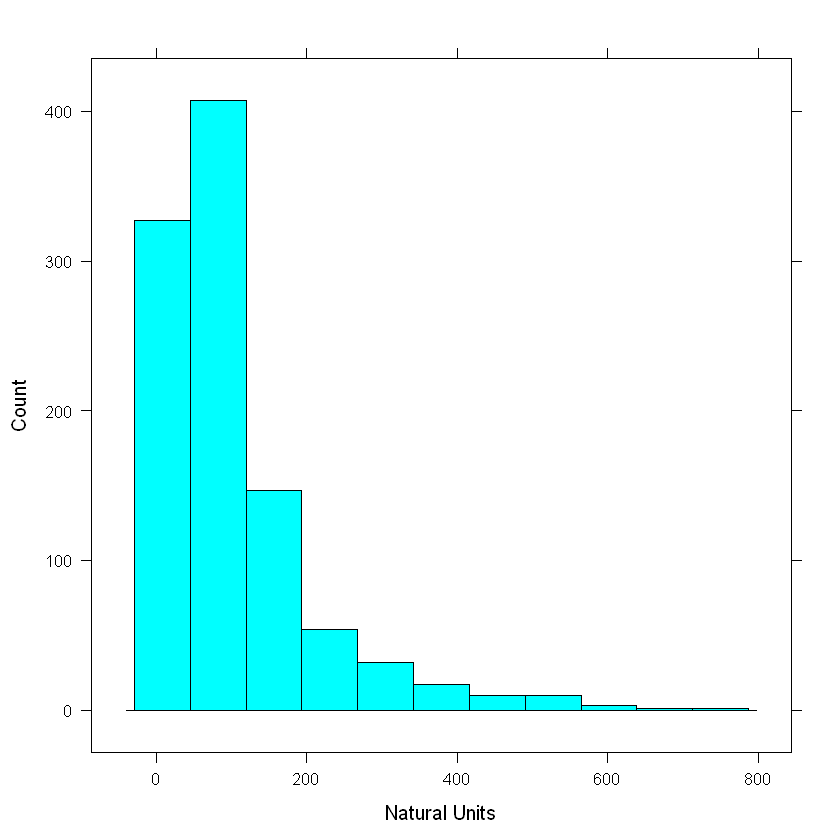

Box-Cox Transformation

1009 data points used to estimate Lambda

Input data summary:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  47.74   64.37   79.02   91.61  103.20  459.80 

Largest/Smallest: 9.63 
Sample Skewness: 2.59 

Estimated Lambda: -1.1 


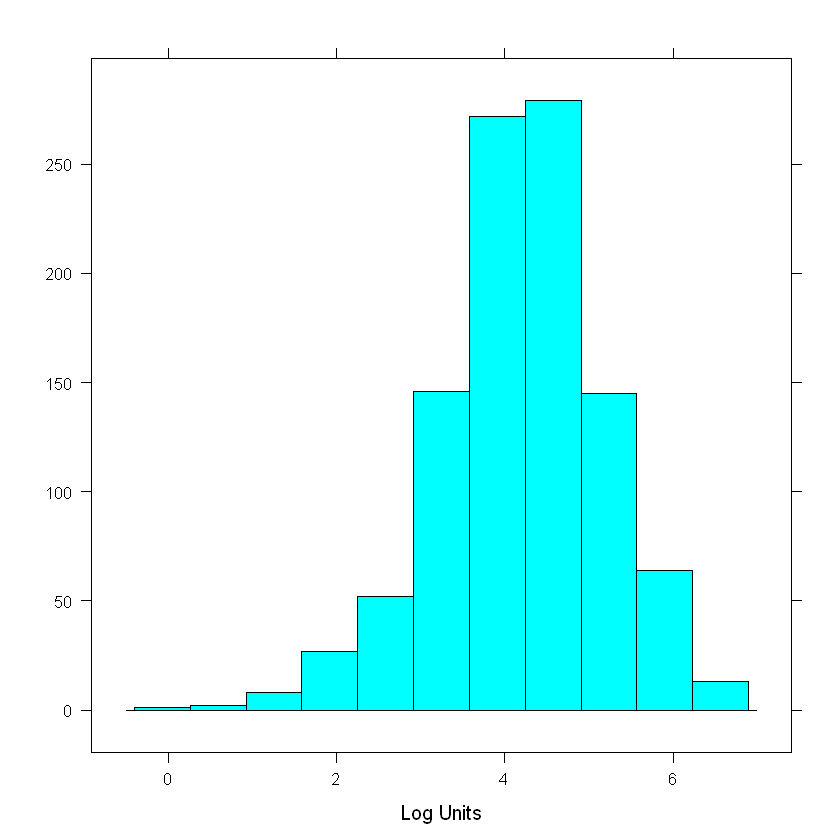

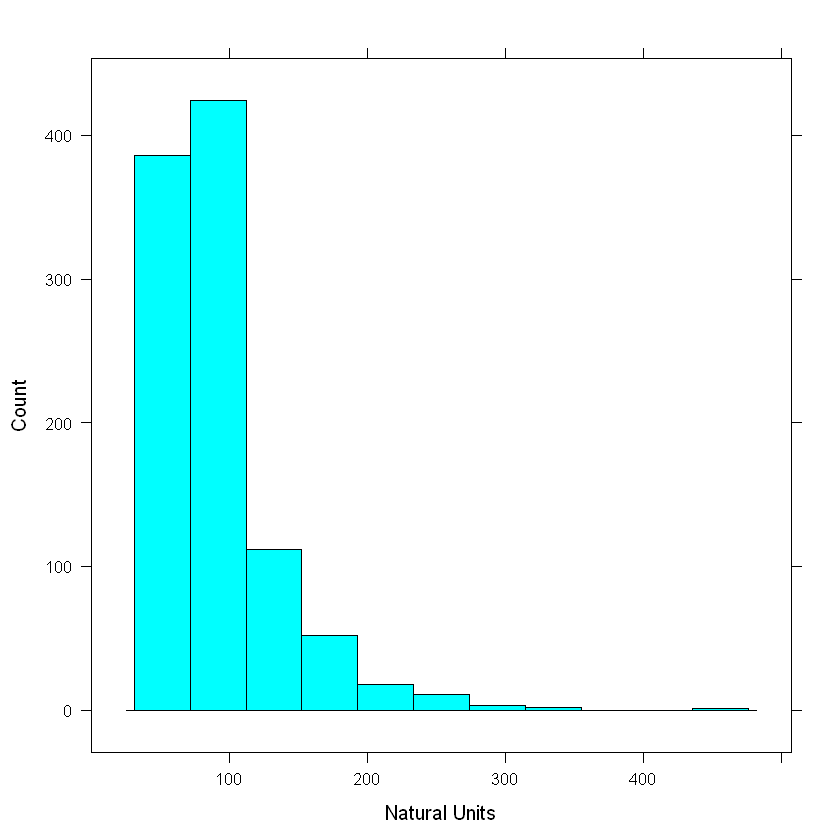

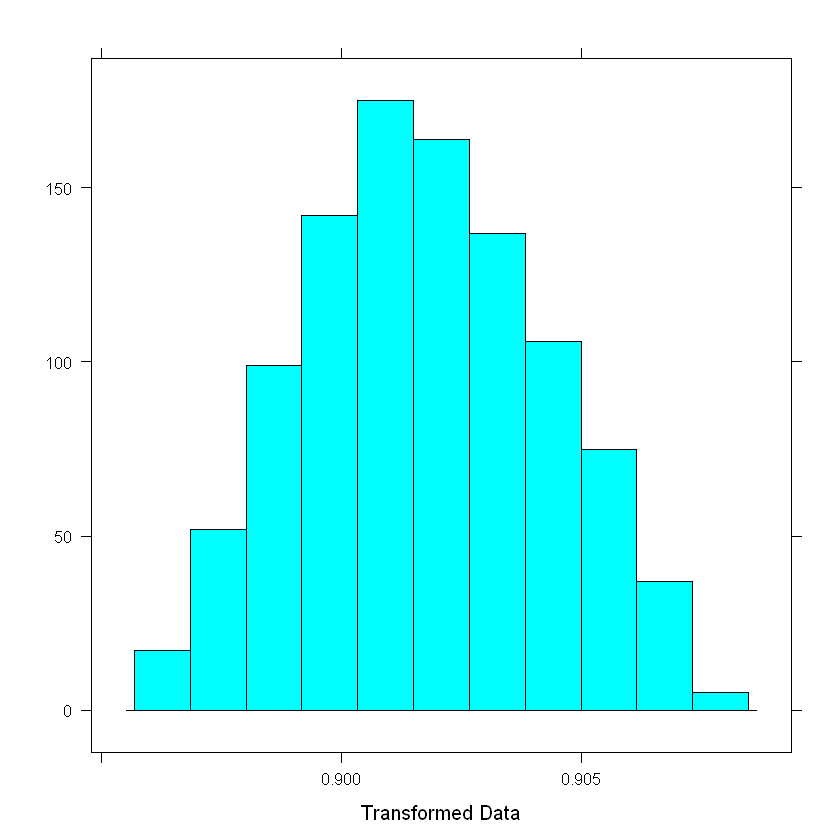

In [13]:
### Section 3.2 Data Transformations for Individual Predictors

## The column VarIntenCh3 measures the standard deviation of the intensity
## of the pixels in the actin filaments

max(segTrainX$VarIntenCh3)/min(segTrainX$VarIntenCh3)

library(e1071)
skewness(segTrainX$VarIntenCh3)

library(caret)

## Use caret's preProcess function to transform for skewness
segPP <- preProcess(segTrainX, method = "BoxCox")

## Apply the transformations
segTrainTrans <- predict(segPP, segTrainX)

## Results for a single predictor
segPP$bc$VarIntenCh3

histogram(~segTrainX$VarIntenCh3,
          xlab = "Natural Units",
          type = "count")

histogram(~log(segTrainX$VarIntenCh3),
          xlab = "Log Units",
          ylab = " ",
          type = "count")
segPP$bc$PerimCh1

histogram(~segTrainX$PerimCh1,
          xlab = "Natural Units",
          type = "count")

histogram(~segTrainTrans$PerimCh1,
          xlab = "Transformed Data",
          ylab = " ",
          type = "count")

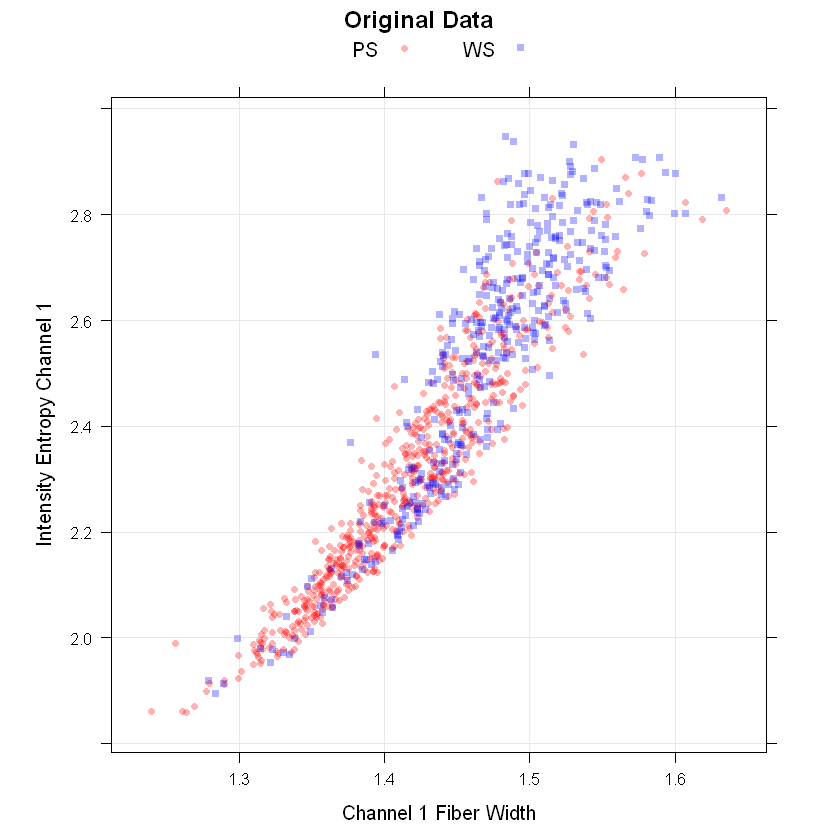

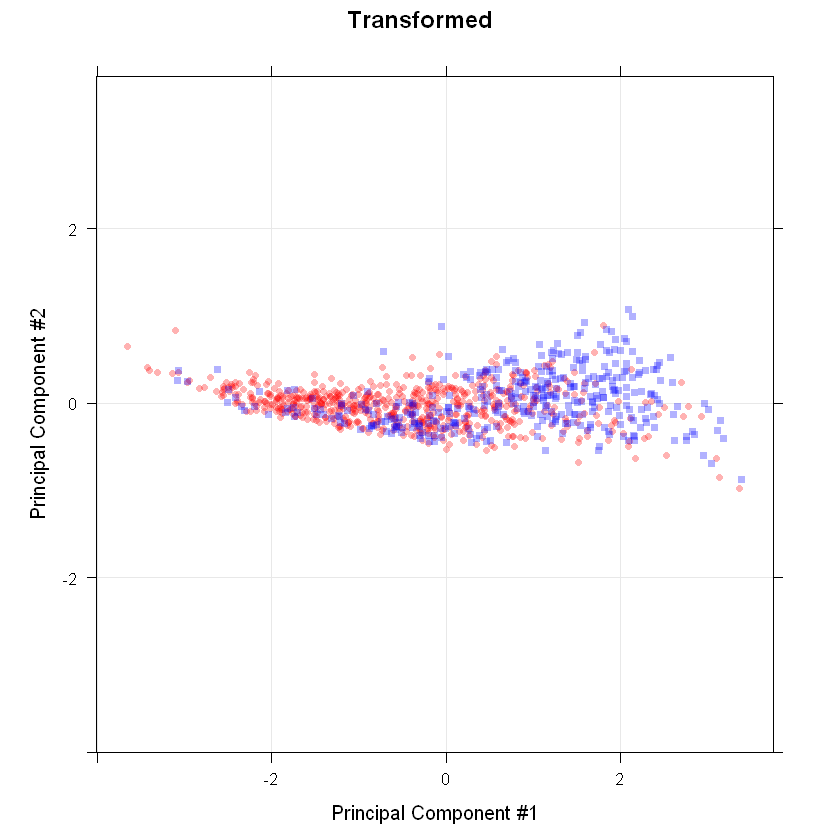

ERROR: Error in library(ellipse): there is no package called 'ellipse'


Warning message:
In grid.Call.graphics(L_text, as.graphicsAnnot(x$label), x$x, x$y, : 'mbcsToSbcs'里转换'娌℃湁"ellipse"杩欎釜鍑芥暟'出错：<e6>代替了dotWarning message:
In grid.Call.graphics(L_text, as.graphicsAnnot(x$label), x$x, x$y, : 'mbcsToSbcs'里转换'娌℃湁"ellipse"杩欎釜鍑芥暟'出错：<b2>代替了dotWarning message:
In grid.Call.graphics(L_text, as.graphicsAnnot(x$label), x$x, x$y, : 'mbcsToSbcs'里转换'娌℃湁"ellipse"杩欎釜鍑芥暟'出错：<a1>代替了dotWarning message:
In grid.Call.graphics(L_text, as.graphicsAnnot(x$label), x$x, x$y, : 'mbcsToSbcs'里转换'娌℃湁"ellipse"杩欎釜鍑芥暟'出错：<e6>代替了dotWarning message:
In grid.Call.graphics(L_text, as.graphicsAnnot(x$label), x$x, x$y, : 'mbcsToSbcs'里转换'娌℃湁"ellipse"杩欎釜鍑芥暟'出错：<9c>代替了dotWarning message:
In grid.Call.graphics(L_text, as.graphicsAnnot(x$label), x$x, x$y, : 'mbcsToSbcs'里转换'娌℃湁"ellipse"杩欎釜鍑芥暟'出错：<89>代替了dotWarning message:
In grid.Call.graphics(L_text, as.graphicsAnnot(x$label), x$x, x$y, : 'mbcsToSbcs'里转换'娌℃湁"ellipse"杩欎釜鍑芥暟'出错：<e8>代替了dotWarning message:
In grid.Call.graphics(L_text, as.graphicsAnno

ERROR: Error in grid.Call.graphics(L_downviewport, name$name, strict): Viewport 'plot_01.panel.1.1.off.vp' was not found


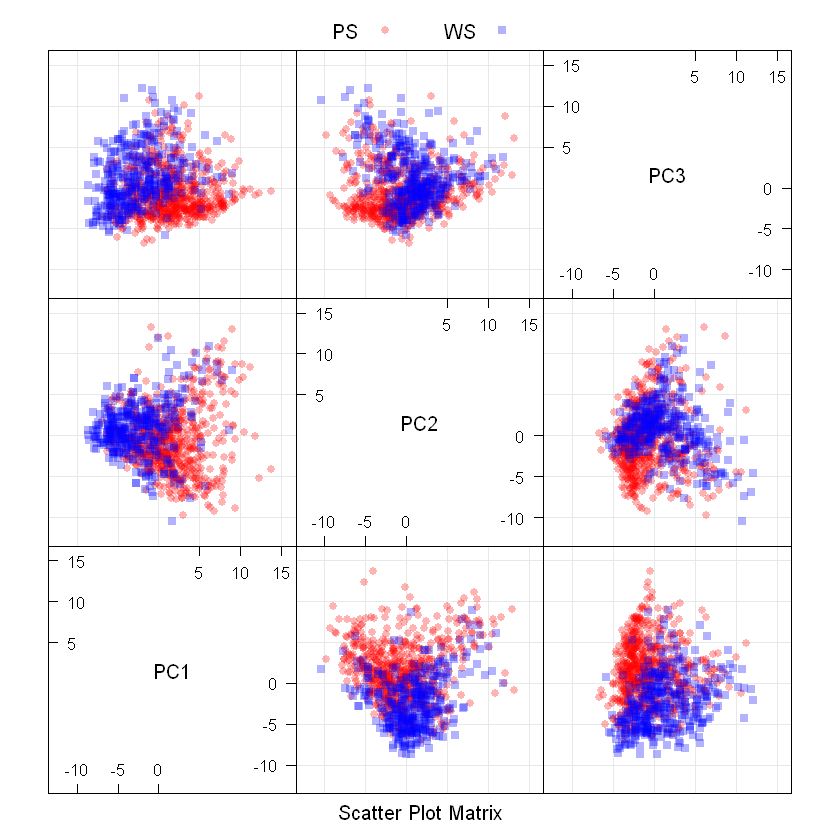

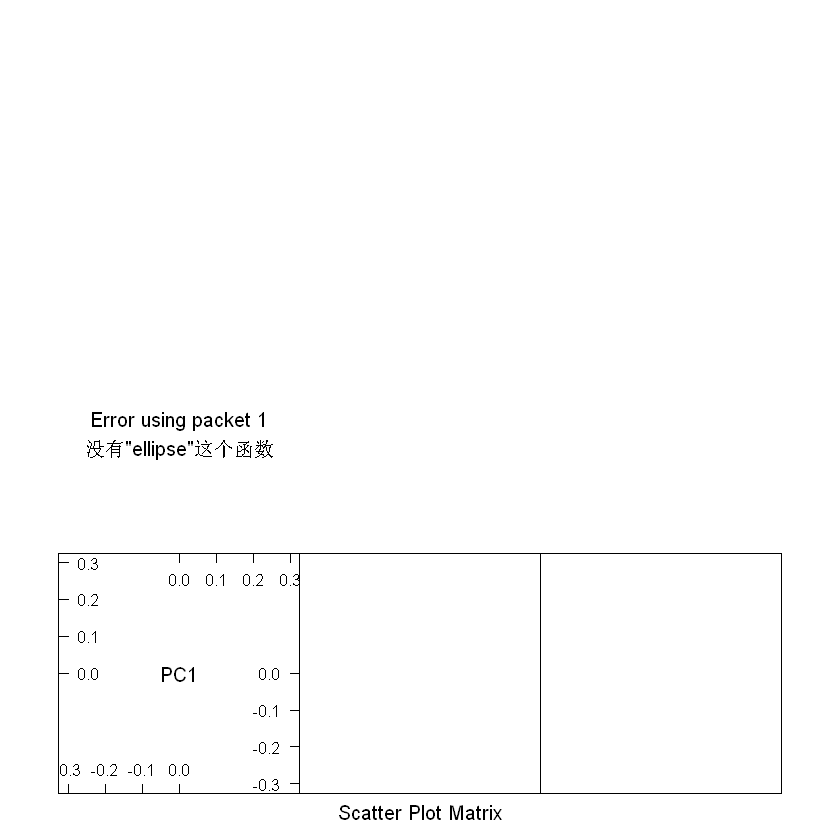

In [14]:
### Section 3.3 Data Transformations for Multiple Predictors

## R's prcomp is used to conduct PCA
pr <- prcomp(~ AvgIntenCh1 + EntropyIntenCh1,
             data = segTrainTrans,
             scale. = TRUE)

transparentTheme(pchSize = .7, trans = .3)

xyplot(AvgIntenCh1 ~ EntropyIntenCh1,
       data = segTrainTrans,
       groups = segTrain$Class,
       xlab = "Channel 1 Fiber Width",
       ylab = "Intensity Entropy Channel 1",
       auto.key = list(columns = 2),
       type = c("p", "g"),
       main = "Original Data",
       aspect = 1)

xyplot(PC2 ~ PC1,
       data = as.data.frame(pr$x),
       groups = segTrain$Class,
       xlab = "Principal Component #1",
       ylab = "Principal Component #2",
       main = "Transformed",
       xlim = extendrange(pr$x),
       ylim = extendrange(pr$x),
       type = c("p", "g"),
       aspect = 1)

## Apply PCA to the entire set of predictors.

## There are a few predictors with only a single value, so we remove these first
## (since PCA uses variances, which would be zero)

isZV <- apply(segTrainX, 2, function(x) length(unique(x)) == 1)
segTrainX <- segTrainX[, !isZV]

segPP <- preProcess(segTrainX, c("BoxCox", "center", "scale"))
segTrainTrans <- predict(segPP, segTrainX)

segPCA <- prcomp(segTrainTrans, center = TRUE, scale. = TRUE)

## Plot a scatterplot matrix of the first three components
transparentTheme(pchSize = .8, trans = .3)

panelRange <- extendrange(segPCA$x[, 1:3])

splom(as.data.frame(segPCA$x[, 1:3]),
      groups = segTrainClass,
      type = c("p", "g"),
      as.table = TRUE,
      auto.key = list(columns = 2),
      prepanel.limits = function(x) panelRange)

## Format the rotation values for plotting
segRot <- as.data.frame(segPCA$rotation[, 1:3])

## Derive the channel variable
vars <- rownames(segPCA$rotation)
channel <- rep(NA, length(vars))
channel[grepl("Ch1$", vars)] <- "Channel 1"
channel[grepl("Ch2$", vars)] <- "Channel 2"
channel[grepl("Ch3$", vars)] <- "Channel 3"
channel[grepl("Ch4$", vars)] <- "Channel 4"

segRot$Channel <- channel
segRot <- segRot[complete.cases(segRot),]

segRot$Channel <- factor(as.character(segRot$Channel))

## Plot a scatterplot matrix of the first three rotation variables

transparentTheme(pchSize = .8, trans = .7)
panelRange <- extendrange(segRot[, 1:3])
library(ellipse)
upperp <- function(...)
  {
    args <- list(...)
    circ1 <- ellipse(diag(rep(1, 2)), t = .1)
    panel.xyplot(circ1[,1], circ1[,2],
                 type = "l",
                 lty = trellis.par.get("reference.line")$lty,
                 col = trellis.par.get("reference.line")$col,
                 lwd = trellis.par.get("reference.line")$lwd)
    circ2 <- ellipse(diag(rep(1, 2)), t = .2)
    panel.xyplot(circ2[,1], circ2[,2],
                 type = "l",
                 lty = trellis.par.get("reference.line")$lty,
                 col = trellis.par.get("reference.line")$col,
                 lwd = trellis.par.get("reference.line")$lwd)
    circ3 <- ellipse(diag(rep(1, 2)), t = .3)
    panel.xyplot(circ3[,1], circ3[,2],
                 type = "l",
                 lty = trellis.par.get("reference.line")$lty,
                 col = trellis.par.get("reference.line")$col,
                 lwd = trellis.par.get("reference.line")$lwd)
    panel.xyplot(args$x, args$y, groups = args$groups, subscripts = args$subscripts)
  }
          
splom(~segRot[, 1:3],
      groups = segRot$Channel,
      lower.panel = function(...){}, upper.panel = upperp,
      prepanel.limits = function(x) panelRange,
      auto.key = list(columns = 2))

In [ ]:
### Section 3.5 Removing Variables

## To filter on correlations, we first get the correlation matrix for the
## predictor set

segCorr <- cor(segTrainTrans)

library(corrplot)
corrplot(segCorr, order = "hclust", tl.cex = .35)

## caret's findCorrelation function is used to identify columns to remove.
highCorr <- findCorrelation(segCorr, .75)

highCorr

In [ ]:
### Section 3.8 Computing (Creating Dummy Variables)

data(cars)
type <- c("convertible", "coupe", "hatchback", "sedan", "wagon")
cars$Type <- factor(apply(cars[, 14:18], 1, function(x) type[which(x == 1)]))

carSubset <- cars[sample(1:nrow(cars), 20), c(1, 2, 19)]

head(carSubset)
levels(carSubset$Type)

In [ ]:
simpleMod <- dummyVars(~Mileage + Type,
                       data = carSubset,
                       ## Remove the variable name from the
                       ## column name
                       levelsOnly = TRUE)
    simpleMod

withInteraction <- dummyVars(~Mileage + Type + Mileage:Type,
                             data = carSubset,
                             levelsOnly = TRUE)
withInteraction
predict(withInteraction, head(carSubset))

In [ ]:
showChapterScript(4)

In [ ]:
showChapterOutput(4)

In [ ]:
PATIENT = FALSE

if (PATIENT) {
    runChapterScript(4)
}

#  this required about an hour of computation

minutes_required_for_this_script = 3260.432 / 60 
minutes_required_for_this_script

## user   system  elapsed 
## 3260.432  211.968  906.933 

In [15]:
######## This computation can take five minutes to complete on a single cpu.

### Section 4.6 Choosing Final Tuning Parameters

detach(package:caret)  # reload the package, since the code here modifies GermanCredit
library(caret)
data(GermanCredit)

## First, remove near-zero variance predictors then get rid of a few predictors
## that duplicate values. For example, there are two possible values for the
## housing variable: "Rent", "Own" and "ForFree". So that we don't have linear
## dependencies, we get rid of one of the levels (e.g. "ForFree")

GermanCredit <- GermanCredit[, -nearZeroVar(GermanCredit)]
GermanCredit$CheckingAccountStatus.lt.0 <- NULL
GermanCredit$SavingsAccountBonds.lt.100 <- NULL
GermanCredit$EmploymentDuration.lt.1 <- NULL
GermanCredit$EmploymentDuration.Unemployed <- NULL
GermanCredit$Personal.Male.Married.Widowed <- NULL
GermanCredit$Property.Unknown <- NULL
GermanCredit$Housing.ForFree <- NULL

## Split the data into training (80%) and test sets (20%)
set.seed(100)
inTrain <- createDataPartition(GermanCredit$Class, p = .8)[[1]]
GermanCreditTrain <- GermanCredit[ inTrain, ]
GermanCreditTest  <- GermanCredit[-inTrain, ]

## The model fitting code shown in the computing section is fairly
## simplistic.  For the text we estimate the tuning parameter grid
## up-front and pass it in explicitly. This generally is not needed,
## but was used here so that we could trim the cost values to a
## presentable range and to re-use later with different resampling
## methods.

library(kernlab)
set.seed(231)
sigDist <- sigest(Class ~ ., data = GermanCreditTrain, frac = 1)
svmTuneGrid <- data.frame(sigma = as.vector(sigDist)[1], C = 2^(-2:7))

### Optional: parallel processing can be used via the 'do' packages,
### such as doMC, doMPI etc. We used doMC (not on Windows) to speed
### up the computations.

### WARNING: Be aware of how much memory is needed to parallel
### process. It can very quickly overwhelm the available hardware. We
### estimate the memory usage (VSIZE = total memory size) to be
### 2566M/core.

### library(doMC)
### registerDoMC(4)

set.seed(1056)
svmFit <- train(Class ~ .,
                data = GermanCreditTrain,
                method = "svmRadial",
                preProc = c("center", "scale"),
                tuneGrid = svmTuneGrid,
                trControl = trainControl(method = "repeatedcv",
                                         repeats = 5,
                                         classProbs = TRUE))
## classProbs = TRUE was added since the text was written

## Print the results
svmFit

## A line plot of the average performance. The 'scales' argument is actually an
## argument to xyplot that converts the x-axis to log-2 units.

plot(svmFit, scales = list(x = list(log = 2)))

## Test set predictions

predictedClasses <- predict(svmFit, GermanCreditTest)
str(predictedClasses)

## Use the "type" option to get class probabilities

predictedProbs <- predict(svmFit, newdata = GermanCreditTest, type = "prob")
head(predictedProbs)

Warning message:
: package 'caret' was built under R version 3.2.5

ERROR: Error in library(kernlab): there is no package called 'kernlab'


ERROR: Error in eval(expr, envir, enclos): 没有"sigest"这个函数


ERROR: Error in as.vector(sigDist): 找不到对象'sigDist'


1 package is needed for this model and is not installed. (kernlab). Would you like to try to install it now?

ERROR: Error in checkInstall(models$library): 


ERROR: Error in eval(expr, envir, enclos): 找不到对象'svmFit'


ERROR: Error in plot(svmFit, scales = list(x = list(log = 2))): 找不到对象'svmFit'


ERROR: Error in predict(svmFit, GermanCreditTest): 找不到对象'svmFit'


ERROR: Error in str(predictedClasses): 找不到对象'predictedClasses'


ERROR: Error in predict(svmFit, newdata = GermanCreditTest, type = "prob"): 找不到对象'svmFit'


ERROR: Error in head(predictedProbs): 找不到对象'predictedProbs'


In [ ]:
######## This computation can take over a half hour to complete on a single cpu.

## Fit the same model using different resampling methods. The main syntax change
## is the control object.

set.seed(1056)
svmFit10CV <- train(Class ~ .,
                    data = GermanCreditTrain,
                    method = "svmRadial",
                    preProc = c("center", "scale"),
                    tuneGrid = svmTuneGrid,
                    trControl = trainControl(method = "cv", number = 10))
svmFit10CV

set.seed(1056)
svmFitLOO <- train(Class ~ .,
                   data = GermanCreditTrain,
                   method = "svmRadial",
                   preProc = c("center", "scale"),
                   tuneGrid = svmTuneGrid,
                   trControl = trainControl(method = "LOOCV"))
svmFitLOO

set.seed(1056)
svmFitLGO <- train(Class ~ .,
                   data = GermanCreditTrain,
                   method = "svmRadial",
                   preProc = c("center", "scale"),
                   tuneGrid = svmTuneGrid,
                   trControl = trainControl(method = "LGOCV",
                                            number = 50,
                                            p = .8))
svmFitLGO

set.seed(1056)
svmFitBoot <- train(Class ~ .,
                    data = GermanCreditTrain,
                    method = "svmRadial",
                    preProc = c("center", "scale"),
                    tuneGrid = svmTuneGrid,
                    trControl = trainControl(method = "boot", number = 50))
svmFitBoot

set.seed(1056)
svmFitBoot632 <- train(Class ~ .,
                       data = GermanCreditTrain,
                       method = "svmRadial",
                       preProc = c("center", "scale"),
                       tuneGrid = svmTuneGrid,
                       trControl = trainControl(method = "boot632",
                                                number = 50))
svmFitBoot632

In [ ]:
### Section 4.8 Choosing Between Models

set.seed(1056)
glmProfile <- train(Class ~ .,
                    data = GermanCreditTrain,
                    method = "glm",
                    trControl = trainControl(method = "repeatedcv",
                                             repeats = 5))
glmProfile

resamp <- resamples(list(SVM = svmFit, Logistic = glmProfile))
summary(resamp)

## These results are slightly different from those shown in the text.
## There are some differences in the train() function since the
## original results were produced. This is due to a difference in
## predictions from the ksvm() function when class probs are requested
## and when they are not. See, for example,
## https://stat.ethz.ch/pipermail/r-help/2013-November/363188.html

modelDifferences <- diff(resamp)
summary(modelDifferences)

## The actual paired t-test:
modelDifferences$statistics$Accuracy

In [ ]:
showChapterScript(6)

In [ ]:
showChapterOutput(6)

In [ ]:
runChapterScript(6)

##     user  system elapsed 
##  540.993  74.917 615.942 

In [ ]:
### Section 6.1 Case Study: Quantitative Structure- Activity
### Relationship Modeling

library(AppliedPredictiveModeling)
data(solubility)

library(lattice)

### Some initial plots of the data
xyplot(solTrainY ~ solTrainX$MolWeight, type = c("p", "g"),
       ylab = "Solubility (log)",
       main = "(a)",
       xlab = "Molecular Weight")

xyplot(solTrainY ~ solTrainX$NumRotBonds, type = c("p", "g"),
       ylab = "Solubility (log)",
       xlab = "Number of Rotatable Bonds")

bwplot(solTrainY ~ ifelse(solTrainX[,100] == 1,
                          "structure present",
                          "structure absent"),
       ylab = "Solubility (log)",
       main = "(b)",
       horizontal = FALSE)

In [ ]:
### Find the columns that are not fingerprints (i.e. the continuous
### predictors). grep will return a list of integers corresponding to
### column names that contain the pattern "FP".

notFingerprints <- grep("FP", names(solTrainXtrans))

library(caret)

featurePlot(solTrainXtrans[, -notFingerprints],
            solTrainY,
            between = list(x = 1, y = 1),
            type = c("g", "p", "smooth"),
            labels = rep("", 2))

In [ ]:
library(corrplot)

### We used the full namespace to call this function because the pls
### package (also used in this chapter) has a function with the same
### name.

corrplot::corrplot(cor(solTrainXtrans[, -notFingerprints]),
                   order = "hclust",
                   tl.cex = .8)

In [ ]:
### Section 6.2 Linear Regression

### Create a control function that will be used across models. We
### create the fold assignments explicitly instead of relying on the
### random number seed being set to identical values.

set.seed(100)
indx <- createFolds(solTrainY, returnTrain = TRUE)
ctrl <- trainControl(method = "cv", index = indx)

### Linear regression model with all of the predictors. This will
### produce some warnings that a 'rank-deficient fit may be
### misleading'. This is related to the predictors being so highly
### correlated that some of the math has broken down.


set.seed(100)
lmTune0 <- train(x = solTrainXtrans, y = solTrainY,
                 method = "lm",
                 trControl = ctrl)

lmTune0

### And another using a set of predictors reduced by unsupervised
### filtering. We apply a filter to reduce extreme between-predictor
### correlations. Note the lack of warnings.

tooHigh <- findCorrelation(cor(solTrainXtrans), .9)
trainXfiltered <- solTrainXtrans[, -tooHigh]
testXfiltered  <-  solTestXtrans[, -tooHigh]

set.seed(100)
lmTune <- train(x = trainXfiltered, y = solTrainY,
                method = "lm",
                trControl = ctrl)

lmTune

### Save the test set results in a data frame
testResults <- data.frame(obs = solTestY,
                          Linear_Regression = predict(lmTune, testXfiltered))

In [ ]:
### Section 6.3 Partial Least Squares

## Run PLS and PCR on solubility data and compare results
set.seed(100)
plsTune <- train(x = solTrainXtrans, y = solTrainY,
                 method = "pls",
                 tuneGrid = expand.grid(ncomp = 1:20),
                 trControl = ctrl)

plsTune


testResults$PLS <- predict(plsTune, solTestXtrans)

set.seed(100)
pcrTune <- train(x = solTrainXtrans, y = solTrainY,
                 method = "pcr",
                 tuneGrid = expand.grid(ncomp = 1:35),
                 trControl = ctrl)

pcrTune

In [ ]:
plsResamples <- plsTune$results
plsResamples$Model <- "PLS"
pcrResamples <- pcrTune$results
pcrResamples$Model <- "PCR"
plsPlotData <- rbind(plsResamples, pcrResamples)


xyplot(RMSE ~ ncomp,
       data = plsPlotData,
       #aspect = 1,
       xlab = "# Components",
       ylab = "RMSE (Cross-Validation)",
       auto.key = list(columns = 2),
       groups = Model,
       type = c("o", "g"))


plsImp <- varImp(plsTune, scale = FALSE)
plot(plsImp, top = 25, scales = list(y = list(cex = .95)))

In [ ]:
### Section 6.4 Penalized Models

## The text used the elasticnet to obtain a ridge regression model.
## There is now a simple ridge regression method.

ridgeGrid <- expand.grid(lambda = seq(0, .1, length = 15))

set.seed(100)
ridgeTune <- train(x = solTrainXtrans, y = solTrainY,
                   method = "ridge",
                   tuneGrid = ridgeGrid,
                   trControl = ctrl,
                   preProc = c("center", "scale"))

ridgeTune


update(plot(ridgeTune), xlab = "Penalty")

In [ ]:
enetGrid <- expand.grid(lambda = c(0, 0.01, .1),
                        fraction = seq(.05, 1, length = 20))
set.seed(100)
enetTune <- train(x = solTrainXtrans, y = solTrainY,
                  method = "enet",
                  tuneGrid = enetGrid,
                  trControl = ctrl,
                  preProc = c("center", "scale"))

enetTune


plot(enetTune)

testResults$Enet <- predict(enetTune, solTestXtrans)

In [ ]:
showChapterScript(7)

In [ ]:
showChapterOutput(7)

In [ ]:
## runChapterScript(7)

##        user     system    elapsed 
##  112106.723    188.979  12272.168 

In [ ]:
showChapterScript(8)

In [ ]:
showChapterOutput(8)

In [ ]:
##  runChapterScript(8)

##       user    system   elapsed 
##  21280.849   500.609  6798.887 

In [ ]:
library(AppliedPredictiveModeling)
data(solubility)

### Create a control function that will be used across models. We
### create the fold assignments explicitly instead of relying on the
### random number seed being set to identical values.

library(caret)
set.seed(100)
indx <- createFolds(solTrainY, returnTrain = TRUE)
ctrl <- trainControl(method = "cv", index = indx)

################################################################################
### Section 8.1 Basic Regression Trees

library(rpart)

### Fit two CART models to show the initial splitting process. rpart
### only uses formulas, so we put the predictors and outcome into
### a common data frame first.

trainData <- solTrainXtrans
trainData$y <- solTrainY

rpStump <- rpart(y ~ ., data = trainData,
                 control = rpart.control(maxdepth = 1))
rpSmall <- rpart(y ~ ., data = trainData,
                 control = rpart.control(maxdepth = 2))

### Tune the model
library(caret)

set.seed(100)
cartTune <- train(x = solTrainXtrans, y = solTrainY,
                  method = "rpart",
                  tuneLength = 25,
                  trControl = ctrl)
cartTune
## cartTune$finalModel

### Plot the tuning results
plot(cartTune, scales = list(x = list(log = 10)))

In [ ]:
### Use the partykit package to make some nice plots. First, convert
### the rpart objects to party objects.

# library(partykit)
#
# cartTree <- as.party(cartTune$finalModel)
# plot(cartTree)

### Get the variable importance. 'competes' is an argument that
### controls whether splits not used in the tree should be included
### in the importance calculations.

cartImp <- varImp(cartTune, scale = FALSE, competes = FALSE)
cartImp

### Save the test set results in a data frame
testResults <- data.frame(obs = solTestY,
                          CART = predict(cartTune, solTestXtrans))

In [ ]:
# plot(cartImp, cex=0.2)

In [ ]:
### Tune the conditional inference tree

cGrid <- data.frame(mincriterion = sort(c(.95, seq(.75, .99, length = 2))))

set.seed(100)
ctreeTune <- train(x = solTrainXtrans, y = solTrainY,
                   method = "ctree",
                   tuneGrid = cGrid,
                   trControl = ctrl)
ctreeTune
plot(ctreeTune)

##ctreeTune$finalModel
plot(ctreeTune$finalModel)

In [ ]:
testResults$cTree <- predict(ctreeTune, solTestXtrans)

In [ ]:
showChapterScript(10)

In [ ]:
showChapterOutput(10)

In [ ]:
# Try this if you are very patient --
# in the APM version of the output file:

##############   THE RUN TIME FOR THIS SCRIPT IS LISTED AS 5.6 HOURS.

# Chs 10 and 17 evaluate many different models in case studies.
# To run the Ch.10 script:

VERY_PATIENT = FALSE

if (VERY_PATIENT) {
   current_working_directory = getwd()  # remember current directory

   chapter_code_directory = scriptLocation()

   setwd( chapter_code_directory )
   dir()

   source("10_Case_Study_Concrete.R", echo=TRUE)

   setwd(current_working_directory)  # return to working directory
}

##       user    system   elapsed 
##  20277.196   121.470  4043.395 

In [ ]:
showChapterScript(11)

In [ ]:
showChapterOutput(11)

In [ ]:
runChapterScript(11)

##     user  system elapsed 
##   11.120   0.526  11.698 

In [ ]:
### Section 11.1 Class Predictions

library(AppliedPredictiveModeling)

### Simulate some two class data with two predictors
set.seed(975)
training <- quadBoundaryFunc(500)
testing <- quadBoundaryFunc(1000)
testing$class2 <- ifelse(testing$class == "Class1", 1, 0)
testing$ID <- 1:nrow(testing)

### Fit models
library(MASS)
qdaFit <- qda(class ~ X1 + X2, data = training)

library(randomForest)
rfFit <- randomForest(class ~ X1 + X2, data = training, ntree = 2000)

### Predict the test set
testing$qda <- predict(qdaFit, testing)$posterior[,1]
testing$rf <- predict(rfFit, testing, type = "prob")[,1]


### Generate the calibration analysis
library(caret)
calData1 <- calibration(class ~ qda + rf, data = testing, cuts = 10)

### Plot the curve

xyplot(calData1, auto.key = list(columns = 2))

In [ ]:
### To calibrate the data, treat the probabilities as inputs into the
### model

trainProbs <- training
trainProbs$qda <- predict(qdaFit)$posterior[,1]

### These models take the probabilities as inputs and, based on the
### true class, re-calibrate them.
library(klaR)
nbCal <- NaiveBayes(class ~ qda, data = trainProbs, usekernel = TRUE)

### We use relevel() here because glm() models the probability of the
### second factor level.
lrCal <- glm(relevel(class, "Class2") ~ qda, data = trainProbs, family = binomial)

### Now re-predict the test set using the modified class probability
### estimates
testing$qda2 <- predict(nbCal, testing[, "qda", drop = FALSE])$posterior[,1]
testing$qda3 <- predict(lrCal, testing[, "qda", drop = FALSE], type = "response")


### Manipulate the data a bit for pretty plotting
simulatedProbs <- testing[, c("class", "rf", "qda3")]
names(simulatedProbs) <- c("TrueClass", "RandomForestProb", "QDACalibrated")
simulatedProbs$RandomForestClass <-  predict(rfFit, testing)

calData2 <- calibration(class ~ qda + qda2 + qda3, data = testing)
calData2$data$calibModelVar <- as.character(calData2$data$calibModelVar)
calData2$data$calibModelVar <- ifelse(calData2$data$calibModelVar == "qda",
                                      "QDA",
                                      calData2$data$calibModelVar)
calData2$data$calibModelVar <- ifelse(calData2$data$calibModelVar == "qda2",
                                      "Bayesian Calibration",
                                      calData2$data$calibModelVar)

calData2$data$calibModelVar <- ifelse(calData2$data$calibModelVar == "qda3",
                                      "Sigmoidal Calibration",
                                      calData2$data$calibModelVar)

calData2$data$calibModelVar <- factor(calData2$data$calibModelVar,
                                      levels = c("QDA",
                                                 "Bayesian Calibration",
                                                 "Sigmoidal Calibration"))

xyplot(calData2, auto.key = list(columns = 1))

In [ ]:
## These commands are needed to reload GermanCredit, which is changed by this and Ch.4 code:

detach(package:caret)
library(caret)
data(GermanCredit)

## First, remove near-zero variance predictors then get rid of a few predictors
## that duplicate values. For example, there are two possible values for the
## housing variable: "Rent", "Own" and "ForFree". So that we don't have linear
## dependencies, we get rid of one of the levels (e.g. "ForFree")

GermanCredit <- GermanCredit[, -nearZeroVar(GermanCredit)]
GermanCredit$CheckingAccountStatus.lt.0 <- NULL
GermanCredit$SavingsAccountBonds.lt.100 <- NULL
GermanCredit$EmploymentDuration.lt.1 <- NULL
GermanCredit$EmploymentDuration.Unemployed <- NULL
GermanCredit$Personal.Male.Married.Widowed <- NULL
GermanCredit$Property.Unknown <- NULL
GermanCredit$Housing.ForFree <- NULL

## Split the data into training (80%) and test sets (20%)
set.seed(100)
inTrain <- createDataPartition(GermanCredit$Class, p = .8)[[1]]
GermanCreditTrain <- GermanCredit[ inTrain, ]
GermanCreditTest  <- GermanCredit[-inTrain, ]

set.seed(1056)
logisticReg <- train(Class ~ .,
                     data = GermanCreditTrain,
                     method = "glm",
                     trControl = trainControl(method = "repeatedcv",
                                              repeats = 5))

logisticReg


### Predict the test set
creditResults <- data.frame(obs = GermanCreditTest$Class)
creditResults$prob <- predict(logisticReg, GermanCreditTest, type = "prob")[, "Bad"]
creditResults$pred <- predict(logisticReg, GermanCreditTest)
creditResults$Label <- ifelse(creditResults$obs == "Bad",
                              "True Outcome: Bad Credit",
                              "True Outcome: Good Credit")

### Plot the probability of bad credit

histogram(~prob|Label,
          data = creditResults,
          layout = c(2, 1),
          nint = 20,
          xlab = "Probability of Bad Credit",
          type = "count")

### Calculate and plot the calibration curve
creditCalib <- calibration(obs ~ prob, data = creditResults)

xyplot(creditCalib)

### Create the confusion matrix from the test set.

confusionMatrix(data = creditResults$pred,
                reference = creditResults$obs)

In [ ]:
### ROC curves:

### Like glm(), roc() treats the last level of the factor as the event
### of interest so we use relevel() to change the observed class data

library(pROC)
creditROC <- roc(relevel(creditResults$obs, "Good"), creditResults$prob)

coords(creditROC, "all")[,1:3]

auc(creditROC)

ci.auc(creditROC)


### Note the x-axis is reversed
plot(creditROC)

### Old-school:
plot(creditROC, legacy.axes = TRUE)

### Lift charts

creditLift <- lift(obs ~ prob, data = creditResults)

xyplot(creditLift)

In [ ]:
summary(GermanCredit)

In [ ]:
showChapterScript(12)

In [ ]:
showChapterOutput(12)

In [ ]:
## runChapterScript(12)

##        user     system    elapsed 
##  376332.996   8337.928  35694.682 

In [ ]:
showChapterScript(13)

In [ ]:
showChapterOutput(13)

In [ ]:
##  runChapterScript(13)

##       user    system   elapsed 
##  313451.24   2270.67  52861.72 

In [ ]:
showChapterScript(14)

In [ ]:
showChapterOutput(14)

In [ ]:
## runChapterScript(14)

##        user     system    elapsed 
##  208496.296    776.829 209791.456 

In [ ]:
showChapterScript(16)

In [ ]:
showChapterOutput(16)

In [ ]:
## runChapterScript(16)

##        user     system    elapsed 
##  243437.520    682.066 244138.032 

In [ ]:
showChapterScript(17)

In [ ]:
showChapterOutput(17)

In [ ]:
## runChapterScript(17)

##       user    system   elapsed 
##  492217.97  31824.96  39801.06 

In [ ]:
showChapterScript(18)

In [ ]:
showChapterOutput(18)

In [ ]:
runChapterScript(18)

##     user  system elapsed 
##   78.161   0.635  79.081 

In [ ]:
### Section 18.1 Numeric Outcomes

## Load the solubility data

library(AppliedPredictiveModeling)
data(solubility)

trainData <- solTrainXtrans
trainData$y <- solTrainY


## keep the continuous predictors and append the outcome to the data frame
SolContPred <- solTrainXtrans[, !grepl("FP", names(solTrainXtrans))]
numSolPred <- ncol(SolContPred)
SolContPred$Sol <- solTrainY

## Get the LOESS smoother and the summary measure
library(caret)
smoother <- filterVarImp(x = SolContPred[, -ncol(SolContPred)],
                         y = solTrainY,
                         nonpara = TRUE)
smoother$Predictor <- rownames(smoother)
names(smoother)[1] <- "Smoother"

## Calculate the correlation matrices and keep the columns with the correlations
## between the predictors and the outcome

correlations <- cor(SolContPred)[-(numSolPred+1),(numSolPred+1)]
rankCorrelations <- cor(SolContPred, method = "spearman")[-(numSolPred+1),(numSolPred+1)]
corrs <- data.frame(Predictor = names(SolContPred)[1:numSolPred],
                    Correlation = correlations,
                    RankCorrelation  = rankCorrelations)

## The maximal information coefficient (MIC) values can be obtained from the
### minerva package:
if (!(is.element("minerva", installed.packages())))
    install.packages("minerva", repos="http://cran.us.r-project.org")
library(minerva)
MIC <- mine(x = SolContPred[, 1:numSolPred], y = solTrainY)$MIC
MIC <- data.frame(Predictor = rownames(MIC),
                  MIC = MIC[,1])


## The Relief values for regression can be computed using the CORElearn
## package:

library(CORElearn)
ReliefF <- attrEval(Sol ~ .,  data = SolContPred,
                    estimator = "RReliefFequalK")
ReliefF <- data.frame(Predictor = names(ReliefF),
                  Relief = ReliefF)

## Combine them all together for a plot
contDescrScores <- merge(smoother, corrs)
contDescrScores <- merge(contDescrScores, MIC)
contDescrScores <- merge(contDescrScores, ReliefF)

rownames(contDescrScores) <- contDescrScores$Predictor

contDescrScores

contDescrSplomData <- contDescrScores
contDescrSplomData$Correlation <- abs(contDescrSplomData$Correlation)
contDescrSplomData$RankCorrelation <- abs(contDescrSplomData$RankCorrelation)
contDescrSplomData$Group <- "Other"
contDescrSplomData$Group[grepl("Surface", contDescrSplomData$Predictor)] <- "SA"


In [ ]:
featurePlot(solTrainXtrans[, c("NumCarbon", "SurfaceArea2")],
            solTrainY,
            between = list(x = 1),
            type = c("g", "p", "smooth"),
            df = 3,
            aspect = 1,
            labels = c("", "Solubility"))

splom(~contDescrSplomData[,c(3, 4, 2, 5)],
      groups = contDescrSplomData$Group,
      varnames = c("Correlation", "Rank\nCorrelation", "LOESS", "MIC"))

In [ ]:
## Now look at the categorical (i.e. binary) predictors
SolCatPred <- solTrainXtrans[, grepl("FP", names(solTrainXtrans))]
SolCatPred$Sol <- solTrainY
numSolCatPred <- ncol(SolCatPred) - 1

tests <- apply(SolCatPred[, 1:numSolCatPred], 2,
                  function(x, y)
                    {
                    tStats <- t.test(y ~ x)[c("statistic", "p.value", "estimate")]
                    unlist(tStats)
                    },
               y = solTrainY)

## The results are a matrix with predictors in columns. We reverse this
tests <- as.data.frame(t(tests))
names(tests) <- c("t.Statistic", "t.test_p.value", "mean0", "mean1")
tests$difference <- tests$mean1 - tests$mean0

tests

In [ ]:
## Create a volcano plot
xyplot(-log10(t.test_p.value) ~ difference,
       data = tests,
       xlab = "Mean With Structure - Mean Without Structure",
       ylab = "-log(p-Value)",
       type = "p")

In [ ]:
### Section 18.2 Categorical Outcomes

## Load the segmentation data

data(segmentationData)
segTrain <- subset(segmentationData, Case == "Train")
segTrain$Case <- segTrain$Cell <- NULL

segTest <- subset(segmentationData, Case != "Train")
segTest$Case <- segTest$Cell <- NULL

## Compute the areas under the ROC curve
aucVals <- filterVarImp(x = segTrain[, -1], y = segTrain$Class)
aucVals$Predictor <- rownames(aucVals)

## Cacluate the t-tests as before but with x and y switched
segTests <- apply(segTrain[, -1], 2,
                  function(x, y)
                    {
                    tStats <- t.test(x ~ y)[c("statistic", "p.value", "estimate")]
                    unlist(tStats)
                    },
               y = segTrain$Class)
segTests <- as.data.frame(t(segTests))
names(segTests) <- c("t.Statistic", "t.test_p.value", "mean0", "mean1")
segTests$Predictor <- rownames(segTests)

## Fit a random forest model and get the importance scores
library(randomForest)
set.seed(791)
rfImp <- randomForest(Class ~ ., data = segTrain,
                      ntree = 2000,
                      importance = TRUE)
rfValues <- data.frame(RF = importance(rfImp)[, "MeanDecreaseGini"],
                       Predictor = rownames(importance(rfImp)))

## Now compute the Relief scores
set.seed(791)

ReliefValues <- attrEval(Class ~ ., data = segTrain,
                         estimator="ReliefFequalK", ReliefIterations = 50)
ReliefValues <- data.frame(Relief = ReliefValues,
                           Predictor = names(ReliefValues))

## and the MIC statistics
set.seed(791)
segMIC <- mine(x = segTrain[, -1],
               ## Pass the outcome as 0/1
               y = ifelse(segTrain$Class == "PS", 1, 0))$MIC
segMIC <- data.frame(Predictor = rownames(segMIC),
                  MIC = segMIC[,1])


rankings <- merge(segMIC, ReliefValues)
rankings <- merge(rankings, rfValues)
rankings <- merge(rankings, segTests)
rankings <- merge(rankings, aucVals)
rankings

In [ ]:
rankings$channel <- "Channel 1"
rankings$channel[grepl("Ch2$", rankings$Predictor)] <- "Channel 2"
rankings$channel[grepl("Ch3$", rankings$Predictor)] <- "Channel 3"
rankings$channel[grepl("Ch4$", rankings$Predictor)] <- "Channel 4"
rankings$t.Statistic <- abs(rankings$t.Statistic)

splom(~rankings[, c("PS", "t.Statistic", "RF", "Relief", "MIC")],
      groups = rankings$channel,
      varnames = c("ROC\nAUC", "Abs\nt-Stat", "Random\nForest", "Relief", "MIC"),
      auto.key = list(columns = 2))

In [ ]:
## Load the grant data. A script to create and save these data is contained
## in the same directory as this file.

source( file.path( scriptLocation(), "CreateGrantData.R" ),  echo=TRUE )

load("grantData.RData")

dataSubset <- training[pre2008, c("Sponsor62B", "ContractValueBandUnk", "RFCD240302")]

## This is a simple function to compute several statistics for binary predictors
tableCalcs <- function(x, y)
  {
  tab <- table(x, y)
  fet <- fisher.test(tab)
  out <- c(OR = fet$estimate,
           P = fet$p.value,
           Gain = attrEval(y ~ x, estimator = "GainRatio"))
  }

## lapply() is used to execute the function on each column
tableResults <- lapply(dataSubset, tableCalcs, y = training[pre2008, "Class"])

## The results come back as a list of vectors, and "rbind" is used to join
## then together as rows of a table
tableResults <- do.call("rbind", tableResults)
tableResults

## The permuted Relief scores can be computed using a function from the
## AppliedPredictiveModeling package.

permuted <- permuteRelief(x = training[pre2008, c("Sponsor62B", "Day", "NumCI")],
                          y = training[pre2008, "Class"],
                          nperm = 500,
                          ### the remaining options are passed to attrEval()
                          estimator="ReliefFequalK",
                          ReliefIterations= 50)

## The original Relief scores:
permuted$observed

## The number of standard deviations away from the permuted mean:
permuted$standardized

## The distributions of the scores if there were no relationship between the
## predictors and outcomes

histogram(~value|Predictor,
          data = permuted$permutations,
          xlim = extendrange(permuted$permutations$value),
          xlab = "Relief Score")

In [ ]:
showChapterScript(19)

In [ ]:
showChapterOutput(19)

In [ ]:
## runChapterScript(19)

##       user     system    elapsed 
## 257587.585   7078.267  35323.717 

In [3]:
training.set = read.csv( file("HW4_solubility_data/training_set.csv"), header = TRUE )
test.set = read.csv( file("HW4_solubility_data/test_set.csv"), header = TRUE )

In [4]:
head(training.set)

FP001 FP002 FP003 FP004 FP005 FP006 FP007 FP008 FP009 FP010 FP011 FP012 FP013
1     1     0     0     1     0     0     1     0     0     0     0     1     0
2     1     0     1     1     0     0     1     0     0     0     0     0     0
3     0     0     1     0     0     1     1     0     0     0     1     0     0
4     0     1     1     0     1     0     0     1     0     1     0     0     0
5     1     1     0     1     1     1     0     0     1     0     1     0     0
6     1     1     0     1     1     0     0     1     0     1     0     0     0
  FP014 FP015 FP016 FP017 FP018 FP019 FP020 FP021 FP022 FP023 FP024 FP025 FP026
1     0     1     0     0     0     0     1     0     0     1     0     0     0
2     0     1     0     0     0     0     0     0     0     1     0     0     0
3     0     1     0     0     0     0     0     0     0     0     0     0     0
4     0     1     0     0     0     0     0     0     0     1     0     0     0
5     0     1     0     0     1     0     0     1     0     0     0     0     0
6     0     1     0     0     0     0     0     0     0     0     0     1     0
  FP027 FP028 FP029 FP030 FP031 FP032 FP033 FP034 FP035 FP036 FP037 FP038 FP039
1     0     0     0     0     1     0     0     0     0     0     0     0     0
2     0     0     0     0     0     0     0     0     0     0     0     0     0
3     0     0     0     0     0     0     0     0     0     0     0     0     0
4     0     0     0     0     0     1     1     0     0     0     0     0     0
5     0     0     0     0     1     0     0     0     0     0     0     0     0
6     0     0     0     0     0     0     0     0     0     0     0     1     1
  FP040 FP041 FP042 FP043 FP044 FP045 FP046 FP047 FP048 FP049 FP050 FP051 FP052
1     0     1     0     1     0     0     0     0     0     0     0     0     0
2     0     1     0     0     0     0     0     0     0     0     0     0     0
3     0     0     0     0     0     0     0     0     0     0     0     0     0
4     0     0     0     0     0     0     0     1     0     0     0     0     0
5     0     0     0     0     0     0     1     0     0     0     0     1     0
6     0     0     0     0     0     1     1     1     0     0     0     0     0
  FP053 FP054 FP055 FP056 FP057 FP058 FP059 FP060 FP061 FP062 FP063 FP064 FP065
1     0     0     0     0     0     0     0     1     1     1     1     0     0
2     0     0     0     0     0     0     0     0     0     1     0     1     0
3     0     0     0     0     0     0     0     1     0     0     0     1     0
4     0     0     1     0     0     0     0     1     1     0     0     0     1
5     0     0     0     0     0     1     0     0     0     1     1     0     1
6     0     0     0     1     0     0     0     1     1     1     0     1     1
  FP066 FP067 FP068 FP069 FP070 FP071 FP072 FP073 FP074 FP075 FP076 FP077 FP078
1     1     0     1     1     0     0     1     0     0     1     0     1     0
2     1     0     0     1     1     0     1     0     0     0     0     1     0
3     1     0     0     1     0     0     1     1     1     0     0     0     0
4     1     0     0     1     1     0     1     1     1     0     1     0     1
5     0     1     1     0     0     1     1     0     0     0     1     0     1
6     0     0     0     0     0     0     1     1     0     0     1     0     0
  FP079 FP080 FP081 FP082 FP083 FP084 FP085 FP086 FP087 FP088 FP089 FP090 FP091
1     1     1     1     1     0     1     0     1     1     0     0     1     0
2     0     0     1     1     0     0     0     1     0     0     0     0     0
3     0     0     1     1     0     0     0     1     0     1     0     0     0
4     1     0     0     1     0     0     0     0     1     0     1     0     0
5     1     0     0     1     1     1     0     0     1     0     0     0     1
6     1     0     0     1     0     0     0     0     1     1     1     0     0
  FP092 FP093 FP094 FP095 FP096 FP097 FP098 FP099 FP100 FP101 FP102 FP103 FP104
1 

In [5]:
if (not.installed("kernlab"))  install.packages("kernlab", repos="http://cran.us.r-project.org")   # multicore computation in R in windows
library(kernlab)
set.seed(1)
svmFit = train(solubility ~ .,
                    data = training.set,
                    method = "svmRadial",
                    preProc = c("center", "scale"),
                    tuneLength = 14,
                    trControl = trainControl(method = "repeatedcv", repeats=3))


Attaching package: 'kernlab'

The following object is masked from 'package:ggplot2':

    alpha



In [6]:
svmPred = predict(svmFit, test.set)

In [7]:
head(svmPred)

[1]  0.005005382 -6.777915885 -2.208833774 -0.993001617 -4.372885053
[6]  1.264661299

In [8]:
write.table(svmPred, file = "HW4_Solubility_Predictions.csv", append =FALSE, quote = FALSE, sep = ",",
            eol = "\n", na = "", dec = ".", row.names = FALSE,
            col.names = "Solubility", qmethod = c("escape", "double"),
            fileEncoding = "")